## THEORY QUESTION-ANSWERS

1.  What is a Support Vector Machine (SVM) ?
- A supervised ML algorithm that finds the best hyperplane separating classes with maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM ?
 - Hard Margin - NO misclassification allowed
 Soft Margin - some misclassification allowed ( better for noisy data)

 3. What is the mathematical intuition behind SVM ?
- Maximize margin between classes while minimizing classification error using otimization.

4. What is the role of Lagrange Multipliers in SVM ?
- Used to convert constrained optimization into solvable dual form.

5.  What are Support Vectors in SVM ?
- Data points closest to the hyperplane; they define the boundary.

6. What is a Support Vector Classifier (SVC) ?
- SVM model for classification tasks.

7. What is a Support Vector Regressor (SVR) ?
- SVM model for regression ; fits data within a margin of tolerance.

8. What is the Kernel Trick in SVM ?
- Maps data into higher dimensions to separate non-linear data.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
- Linear: Straight hyperplane.
- Polynomial: Non- linear considers interactions
- RBF: Flexible handles complex non-linear data.

10. What is the effect of the C parameter in SVM ?
- COntrols trade-off between margin size and classification error.

11. What is the role of the Gamma parameter in RBF Kernel SVM ?
- Defines influence of a single training point; high gamma = close influence.

12. What is the Naïve Bayes classifier, and why is it called "Naïve" ?
- A probabilistic classifier using Byes therorem assumimg feature independence called naive due to independence assumption.

13. What is Bayes’ Theorem ?
- P(A/B) = P(B/A)P(A)/P(B)

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
- Gaussian : Continuous data
- Multinomial : Count data(e.g text)
- Bernoulli : Binary data

15. When should you use Gaussian Naïve Bayes over other variants ?
- When features follow normal distribution.

16.  What are the key assumptions made by Naïve Bayes ?
- Features are independent and equally important.

17.  What are the advantages and disadvantages of Naïve Bayes ?
- Advantages : Simple , fast works on small data, good for text.
- Disadvantages: Independence assumption unrealistic, poor on correlated data.

18. Why is Naïve Bayes a good choice for text classification ?
- Because word accurrence probabilities work well with independence assumption.

19. Compare SVM and Naïve Bayes for classification tasks.
- SVM: Good for high-dimensional, complex boundaries.
- NB: works well for text.

20. How does Laplace Smoothing help in Naïve Bayes?
- Avoids zero probability for unseen features by adding a small value.

## PRACTICAL QUESTION-ANSWERS


In [1]:
#  Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn import datasets, svm, metrics
x, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC(kernel='linear')
clf.fit(x,y)
print('Accuracy:', clf.score(x,y))

Accuracy: 0.9933333333333333


In [5]:
# Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.2)
clf_lin = svm.SVC(kernel='linear').fit(x_train,y_train)
clf_rbf = svm.SVC(kernel='rbf').fit(x_train,y_train)
print('Linear:',clf_lin.score(x_test,y_test))
print("RBF:",clf_rbf.score(x_test,y_test))

Linear: 0.9166666666666666
RBF: 0.6111111111111112


In [6]:
#  Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x_train,x_test,y_train,y_test = train_test_split(housing.data, housing.target,test_size=0.2)
reg = svm.SVR().fit(x_train,y_train)
print("MSE:",mean_squared_error(y_test,reg.predict(x_test)))

MSE: 1.4188171438925556


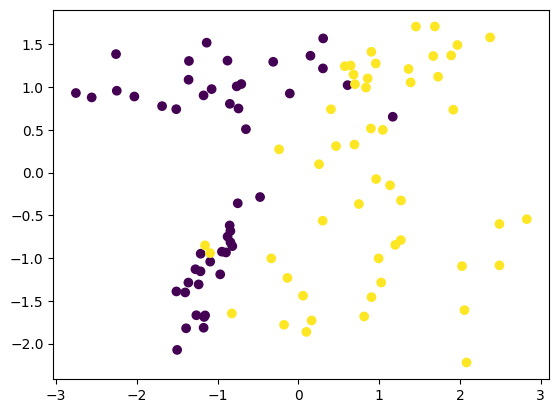

In [7]:
#  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
import matplotlib.pyplot as plt
import numpy as np
x,y = datasets.make_classification(n_features=2,n_redundant=0,n_classes=2)
clf = svm.SVC(kernel='poly',degree=3).fit(x,y)
plt.scatter(x[:,0],x[:,-1],c=y)
plt.show()

In [9]:
# Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.naive_bayes import GaussianNB
bc = datasets.load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(bc.data,bc.target, test_size=0.2)
gnb = GaussianNB().fit(x_train,y_train)
print("Accuracy:", gnb.score(x_test,y_test))

Accuracy: 0.9298245614035088


In [11]:
# Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.naive_bayes import MultinomialNB
news = fetch_20newsgroups_vectorized()
mnb = MultinomialNB().fit(news.data, news.target)
print("Accuracy:",mnb.score(news.data,news.target))

Accuracy: 0.843910199752519


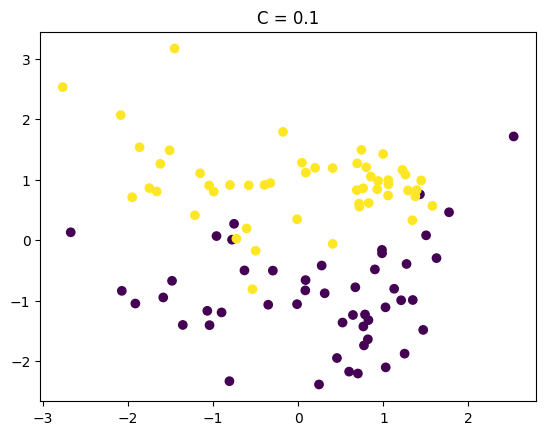

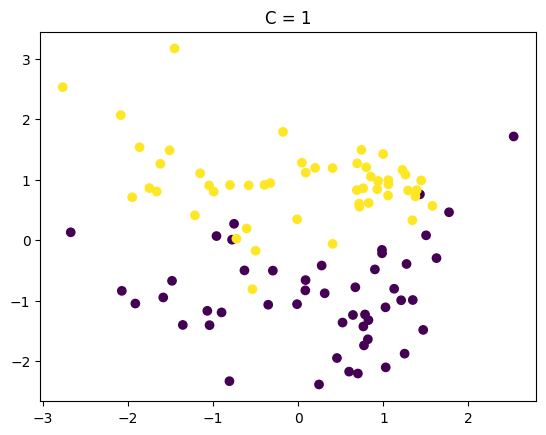

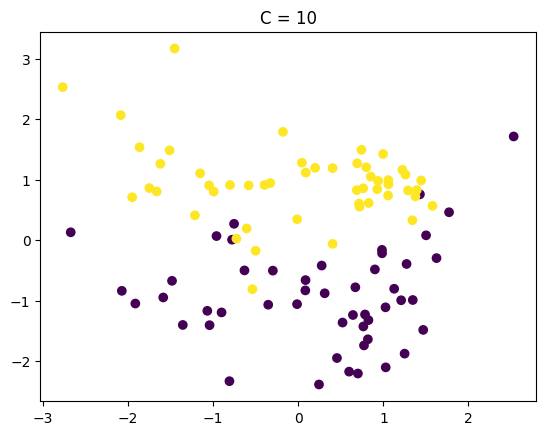

In [13]:
#Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
x,y = datasets.make_classification(n_features=2,n_redundant=0)
for c in [0.1,1,10]:
    clf = svm.SVC(kernel='linear',C=c).fit(x,y)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.title(f"C = {c}")
    plt.show()

In [15]:
# Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
x,y= make_classification(n_features=5,n_classes=2)
bnb =BernoulliNB().fit(x>0,y)
print("Accuracy:",bnb.score(x>0,y))

Accuracy: 0.86


In [17]:
# Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
x,y= datasets.load_wine(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
clf1 = svm.SVC().fit(x_train,y_train)
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
clf2 = svm.SVC().fit(x_scaled,y)
print("Unscaled:", clf1.score(x_test,y_test))
print("Scaled:", clf2.score(x_scaled,y))

Unscaled: 0.6481481481481481
Scaled: 1.0


In [25]:
# Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
x,y = load_breast_cancer(return_X_y=True)
gnb = GaussianNB()
gnb.fit(x,y)
print("Before Laplace:", gnb.score(x,y))
gnb2 = GaussianNB(var_smoothing=0)
gnb2.fit(x,y)
print("After Laplace:",gnb2.score(x,y))

Before Laplace: 0.9420035149384886
After Laplace: 0.9402460456942003


In [27]:
# Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
param = {'C':[0.1,1,10],'gamma':[0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm.SVC(),param,cv=5)
grid.fit(x,y)
print("Best score:",grid.best_params_)

Best score: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [28]:
# Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.
from sklearn.datasets import make_classification
x,y = make_classification(weights=[0.9,0.1])
from sklearn.svm import SVC
clf = SVC(class_weight='balanced')
clf.fit(x,y)
print("Accuracy:",clf.score(x,y))

Accuracy: 0.98


In [29]:
#Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
emails = ['Win money now','Hi friend ', 'Claim your free prize', 'Lets meet you tomorrow']
y= [1,0,1,0]
vec = CountVectorizer().fit_transform(emails)
mnb = MultinomialNB().fit(vec,y)
print("Pred:", mnb.predict(vec))

Pred: [1 0 1 0]


In [30]:
# Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
x,y = load_iris(return_X_y=True)
print("SVM:", SVC().fit(x,y).score(x,y))
print("NB:", GaussianNB().fit(x,y).score(x,y))

SVM: 0.9733333333333334
NB: 0.96


In [31]:
# Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
x,y= load_wine(return_X_y=True)
x_new = SelectKBest(chi2,k=5).fit_transform(x,y)
print("Accuracy:", GaussianNB().fit(x_new,y).score(x_new,y))

Accuracy: 0.9662921348314607


In [34]:
# Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_wine
x,y = load_wine(return_X_y=True)
print("OvR:", OneVsRestClassifier(SVC()).fit(x,y).score(x,y))
print("OvO:",OneVsOneClassifier(SVC()).fit(x,y).score(x,y))

OvR: 0.6853932584269663
OvO: 0.7247191011235955


In [35]:
# Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.
from sklearn.datasets import load_breast_cancer
x,y = load_breast_cancer(return_X_y=True)
for k in ['linear','poly','rbf']:
    print(k,svm.SVC(kernel=k).fit(x,y).score(x,y))

linear 0.9666080843585237
poly 0.9138840070298769
rbf 0.9226713532513181


In [50]:
# Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.
from sklearn.model_selection import StratifiedKFold,cross_val_score
x,y = datasets.load_iris(return_X_y=True)
cv = StratifiedKFold(n_splits=5)
print("Avg Accuracy:",cross_val_score(svm.SVC(),x,y,cv=cv).mean())

Avg Accuracy: 0.9666666666666666


In [37]:
# Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
from sklearn.naive_bayes import GaussianNB
x,y = datasets.load_iris(return_X_y=True)
for p in [[0.3,0.3,0.4],[0.2,0.5,0.3]]:
    gnb = GaussianNB(priors=p)
    gnb.fit(x,y)
    print("Priors:",p, "Acc:",gnb.score(x,y))

Priors: [0.3, 0.3, 0.4] Acc: 0.96
Priors: [0.2, 0.5, 0.3] Acc: 0.96


In [39]:
# Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn.feature_selection import RFE
x,y = datasets.load_iris(return_X_y=True)
model = svm.SVC(kernel='linear')
rfe = RFE(model, n_features_to_select=2).fit(x,y)
print("Accuracy:", model.fit(x[:,rfe.support_],y).score(x[:,rfe.support_],y))

Accuracy: 0.9666666666666667


In [40]:
# Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.
from sklearn.metrics import classification_report
x,y = datasets.load_iris(return_X_y=True)
clf = svm.SVC().fit(x,y)
y_pred = clf.predict(x)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [42]:
# Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).
from sklearn.metrics import log_loss
gnb = GaussianNB().fit(x,y)
y_prob = gnb.predict_proba(x)
print("Log Loss:", log_loss(y,y_prob))

Log Loss: 0.1112488207471831


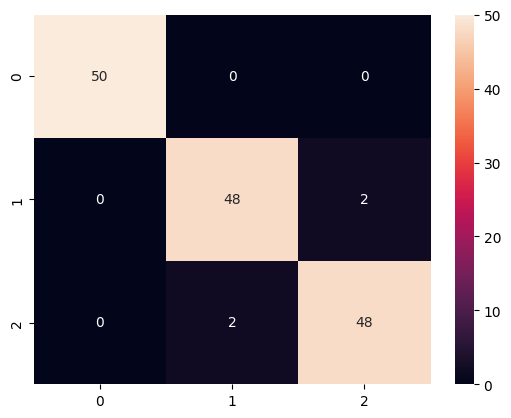

In [44]:
#Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = clf.predict(x)
sns.heatmap(confusion_matrix(y,y_pred),annot = True,fmt = 'd')
plt.show()

In [45]:
# Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2)
reg = svm.SVR().fit(x_train,y_train)
print("MAE:",mean_absolute_error(y_test,reg.predict(x_test)))

MAE: 0.8790007460992807


In [55]:
# Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
x,y = datasets.load_iris(return_X_y=True)
y_bin = label_binarize(y,classes=[0,1,2])
gnb = GaussianNB().fit(x,y)
y_prob = gnb.predict_proba(x)
print("ROC-AUC OvR:", roc_auc_score(y_bin,y_prob,multi_class='ovr'))
print("ROC-AUC OvO:", roc_auc_score(y_bin,y_prob,multi_class='ovo'))

ROC-AUC OvR: 0.9949333333333333
ROC-AUC OvO: 0.9949333333333333


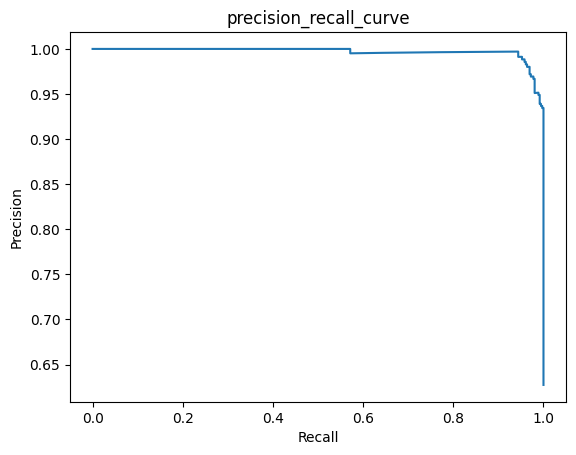

In [51]:
#Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
from sklearn.metrics import precision_recall_curve
x,y = datasets.load_breast_cancer(return_X_y=True)
clf = svm.SVC(kernel='linear',probability=True).fit(x,y)
y_score = clf.decision_function(x)
prec,rec,_ = precision_recall_curve(y,y_score)
plt.plot(rec,prec)
plt.xlabel("Recall")
plt.ylabel('Precision')
plt.title("precision_recall_curve")
plt.show()